### Ruslan Osmanov ID: 327480026
### Beni Wolftson ID: 316535798

### Import Dependencies

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.metrics import classification_report ,ConfusionMatrixDisplay ,confusion_matrix
from keras import layers
from tensorflow.keras.callbacks import TensorBoard
sns.set_theme(style='white')
import datetime 
import pandas as pd
import random
random.seed(10) #לצורך שחזור תוצאות

### Load Data Set 

* Let's load pre-splited data from the bloodmnist data set ,that spliten into validation ,training ,and test 

In [8]:
def load_data(path):
    with np.load(path) as file:
        x_train, y_train = file['train_images'], file['train_labels']
        x_test, y_test = file['test_images'], file['test_labels']
        x_val, y_val = file['val_images'], file['val_labels']
        return (x_train, y_train), (x_test, y_test) , (x_val, y_val) 
    
(x_train, y_train), (x_test, y_test),(x_val ,y_val) = load_data('bloodmnist.npz')

### Data Set Description

**Now we describe our data set dimensions and splits the sets**

In [9]:
## Data Set Dimensions
print('Image Dim: {} x {}'.format(x_train.shape[1],  x_train.shape[2]))
print('Training: {} / Validation: {} / Test: {} /Total: {}'.format(x_train.shape[0],x_val.shape[0],x_test.shape[0],np.sum([x_train.shape[0],x_val.shape[0],x_test.shape[0]])))

Image Dim: 28 x 28
Training: 11959 / Validation: 1712 / Test: 3421 /Total: 17092


* In the next plot it can been see an unbalanced classes ,because each class has different amount of samples

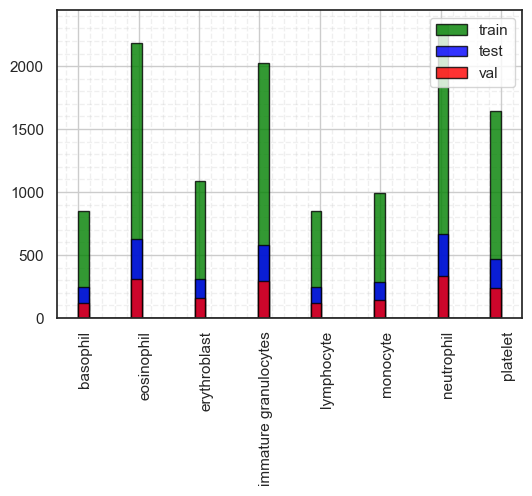

In [10]:
fig, ax = plt.subplots(figsize=(6,4))

class_names=["basophil","eosinophil","erythroblast","immature granulocytes","lymphocyte","monocyte","neutrophil","platelet"]
c= ['green','blue','red']
label = ['train','test','val']

for idx ,a in enumerate([y_train, y_test,y_val]):
    ax.hist(a,color=c[idx],bins=40 ,label=label[idx],edgecolor='black',alpha=0.8)
    ax.grid(visible=True ,which='minor',linestyle='--',alpha=0.3)
    ax.minorticks_on()
    ax.grid()
plt.xticks(ticks=range(8), labels=class_names, rotation=90, horizontalalignment='left')
plt.legend()
plt.show()

**Samples of all classes from the data set** 

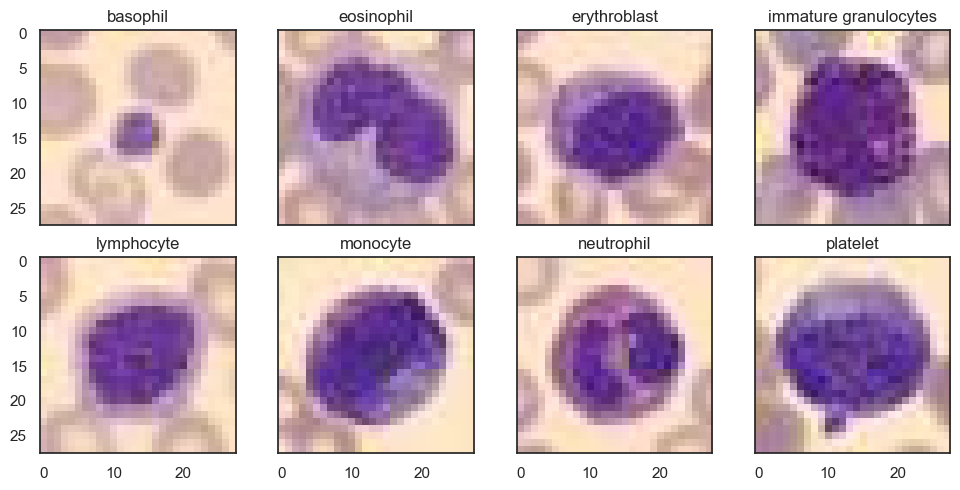

In [66]:
# plot first few images
valueList, indicesList = np.unique(y_train, return_index=True)
fig, ax = plt.subplots(2,4,figsize=(10,5),sharex=True ,sharey=True)
for i,idx in enumerate(indicesList):
    if i <=3:
        ax[0,i].imshow(x_test[idx], cmap=plt.cm.binary)
        ax[0,i].set_title(class_names[i])
    else:
        ax[1,i-4].imshow(x_test[idx], cmap=plt.cm.binary)
        ax[1,i-4].set_title(class_names[i])
            
plt.tight_layout()
plt.show()

### Data preprocces

* Data normalization is a preprocessing step that scales the values in the data to a specific range [0,1]. It is used to scale the features of a dataset so that they have a similar scale and can be more easily compared.

In [12]:
#normalization 
X_train = (x_train.astype('float64')/255).reshape((-1, 28, 28, 3))
X_val = (x_val.astype('float64')/255).reshape((-1, 28, 28, 3))
X_test = (x_test.astype('float64')/255).reshape((-1, 28, 28, 3))
print('Training: {} / Validation: {} / Test: {} /Total: {}'.format(X_train.shape[0],X_val.shape[0],X_test.shape[0],np.sum([X_train.shape[0],X_val.shape[0],X_test.shape[0]])))

Training: 11959 / Validation: 1712 / Test: 3421 /Total: 17092


##### Plotting Functions

In [13]:
def evaluation_plots(classifier):
    losses = pd.DataFrame(classifier.history.history)
    fig,axs =plt.subplots(1,2,figsize=(12,4))
    axs[0].plot(losses[['loss','val_loss']],label=['Train_loss' ,'Val_loss'])
    axs[1].plot(losses[['accuracy','val_accuracy']],label=['Train_accuracy' ,'Val_accuracy'])
    title = ['loss','accuracy']
    for i in range(2):
        axs[i].grid(visible=True ,which='minor',linestyle='--',alpha=0.3)
        axs[i].minorticks_on()
        axs[i].grid()
        axs[i].set_xlabel('epocs')
        axs[i].set_title(title[i])
        axs[i].legend(loc='upper left')
    plt.show()
    
class estimator: # for purpose of using  metrics from sklern package
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred

# DNN

* A fully connected layer (Dense) is a type of layer in which all the nodes in the layer are connected to every node in the previous layer. This means that each node in the fully connected layer receives input from every node in the previous layer, and produces an output that is passed to every node in the next layer. The weights of the connections between the nodes in a fully connected layer are typically learned during training, allowing the network to adjust the weights of the connections to optimize the output of the network for a given task.

In [145]:
classifier = keras.Sequential(name='DNN-64-32_ES')
classifier.add(layers.InputLayer(input_shape=(28,28,3)))
classifier.add(layers.Flatten())
classifier.add(layers.Dense(64 ,activation='relu'))
#classifier.add(layers.Dense(64 ,activation='relu'))
#classifier.add(layers.Dense(256 ,activation='relu'))
#classifier.add(layers.Dropout(0.4))
#classifier.add(layers.Dense(256 ,activation='relu'))
#classifier.add(layers.Dense(512 ,activation='relu'))
classifier.add(layers.Dense(32 ,activation='relu'))
classifier.add(layers.Dense(8, activation='softmax'))
classifier.summary()

Model: "DNN-64-32_ES"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 2352)              0         
                                                                 
 dense_131 (Dense)           (None, 64)                150592    
                                                                 
 dense_132 (Dense)           (None, 32)                2080      
                                                                 
 dense_133 (Dense)           (None, 8)                 264       
                                                                 
Total params: 152,936
Trainable params: 152,936
Non-trainable params: 0
_________________________________________________________________


In [146]:
# Callback for convergence and the purpose of checking progress 
log_dir = "logs/fit_DNN/" + 'DNN-64-32_ES'
tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30, verbose=1)

In [147]:
classifier.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=classifier.fit(X_train, y_train, batch_size=64, epochs=250, validation_data=(X_val,y_val),callbacks=[tb_callback,es_callback])

In [ ]:
evaluation_plots(classifier)

#### Ploting  accuracy and losses of model evaluation 

#### Overfitting 
* Overfitting occurs when a machine learning model is trained too well on the training data, and as a result, it does not generalize well to new, unseen data. In other words, the model has learned patterns in the training data that do not hold true for the broader population, and as a result, its predictions on new data are less accurate.

####  Regulerezation Techniques
**Early stopping**- is a technique that involves interrupting training when the model's performance on a validation set begins to degrade. This can help prevent the model from overfitting to the training data.

**Dropout** - is a regularization technique to prevent overfitting. It works by randomly "dropping out" a certain percentage of the nodes in the network during training. This means that the output of these nodes is set to zero and they are not included in the forward or backward pass. The effect of dropout is to effectively train an ensemble of models, with each model seeing a different subset of the nodes in the network.

**DNN-128-128-256-256-512** 250 epocs

As we can see here ,there are an high overfit ,because the model is trained too well on the training data 
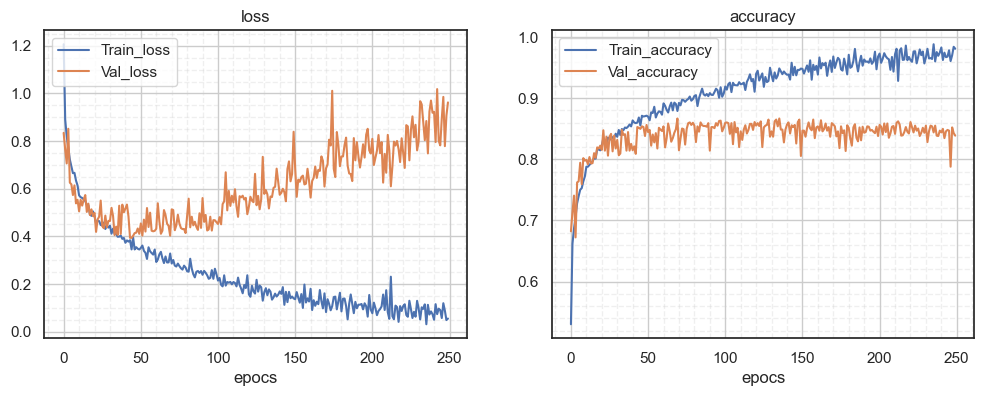

**DNN-64-64-64-32-32** 250 epocs

As we can see here ,there are also overfit but less than previos
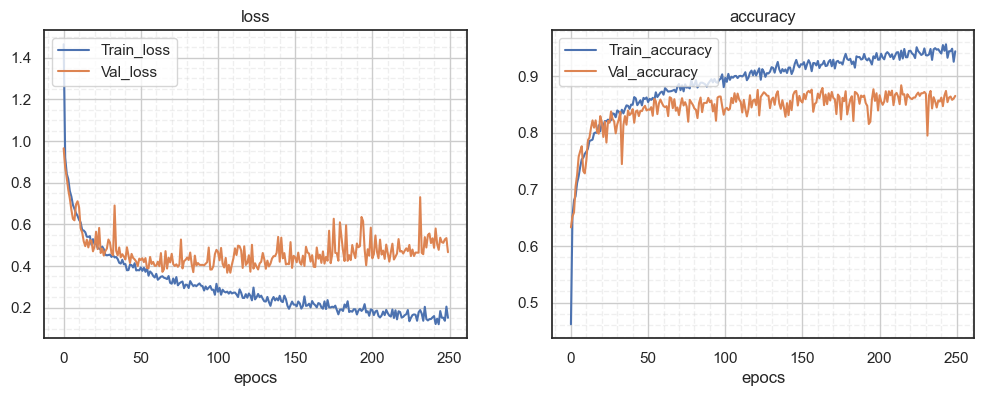

**DNN-64-64-D0.4-64-64** 250 epocs

Now we used a dropout is a regularization technique to prevent overfitting ,it can be seen from the plot that a gap between training and validation losses are close to each other.
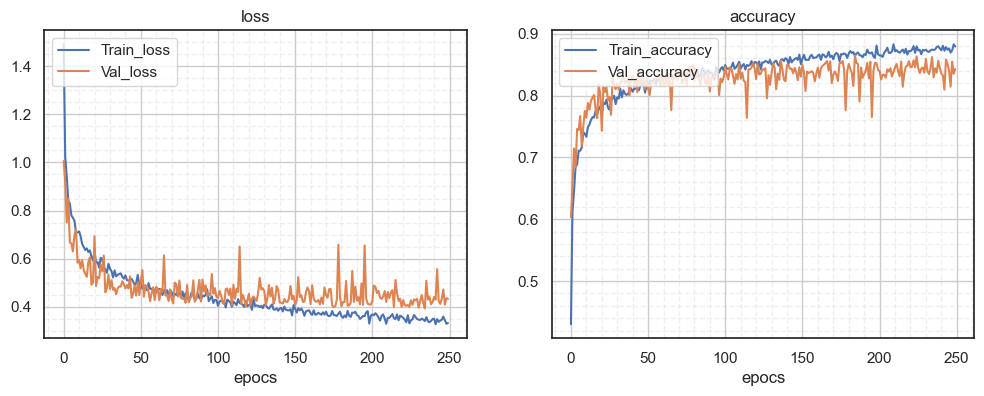

**DNN-64-64-64-64_ES** 250 epocs

Here we used early stopping technique that involves interrupting training when the model's performance on a validation set begins to degrade, as can be seen the gap between the plots in the loss graph is smaller.
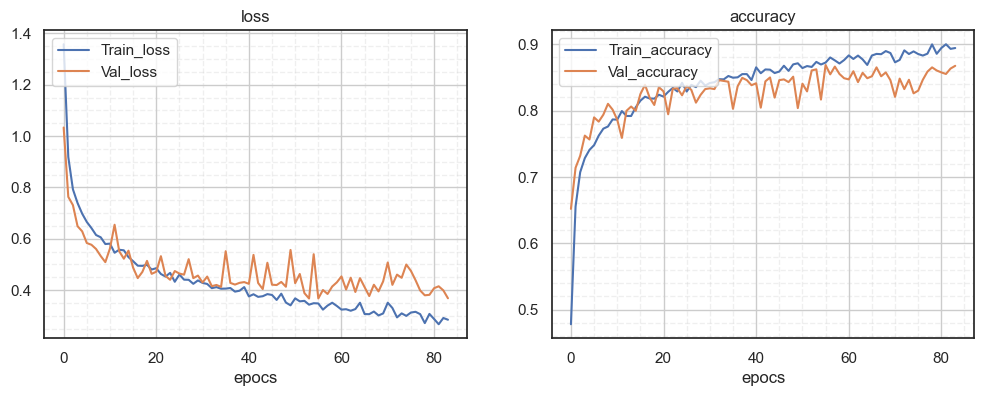

**DNN-64-32_ES** 250 epocs

Here we used early stopping technique that involves interrupting training when the model's performance on a validation set begins to degrade, as can be seen the gap between the plots in the loss graph is smaller
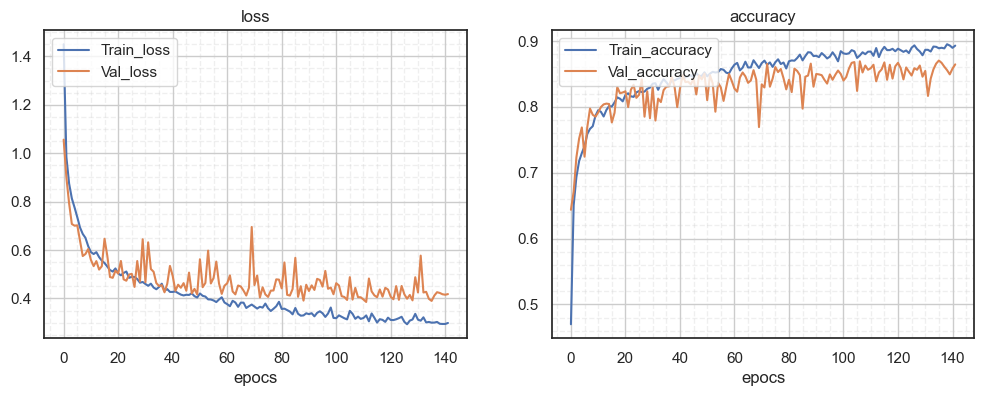

In [ ]:
est = estimator(classifier, class_names)    
predicted_labels = est.predict(X_test)

##### Classification Report

It is one of the performance evaluation metrics of a classification-based machine learning model. It displays your model’s precision, recall, F1 score and support. It provides a better understanding of the overall performance of our trained model. To understand the classification report of a machine learning model, you need to know all of the metrics displayed in the report.


* Precision is defined as the ratio of true positives to the sum of true and false positives.
* Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
* The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
* Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [151]:
print(classification_report(y_test ,predicted_labels ,digits=4,target_names=class_names))

                       precision    recall  f1-score   support

             basophil     0.9206    0.4754    0.6270       244
           eosinophil     0.9408    0.9679    0.9542       624
         erythroblast     0.9324    0.8424    0.8851       311
immature granulocytes     0.6203    0.8325    0.7109       579
           lymphocyte     0.8421    0.8560    0.8490       243
             monocyte     0.7650    0.5845    0.6627       284
           neutrophil     0.9274    0.9009    0.9139       666
             platelet     0.9711    1.0000    0.9853       470

             accuracy                         0.8500      3421
            macro avg     0.8650    0.8075    0.8235      3421
         weighted avg     0.8643    0.8500    0.8482      3421



* As can be seen from the Classification report above,The data is unbalanced (diffirent support samples) ,an avarege accuracy about 0.85 however precision of each class varies from 0.97 to 0.62 ,this phenomenom can also be seen in recall and f1-score

##### Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification algorithm. It helps you to understand how your classification model is performing by comparing the predicted classes and the actual classes in the data set.

* Expected down the side: Each row of the matrix corresponds to a predicted class.
* Predicted across the top: Each column of the matrix corresponds to an actual class.

The counts of correct and incorrect classification are then filled into the table.

The total number of correct predictions for a class go into the expected row for that class value and the predicted column for that class value.

In the same way, the total number of incorrect predictions for a class go into the expected row for that class value and the predicted column for that class value.

107/107 [==============================] - 0s 2ms/step


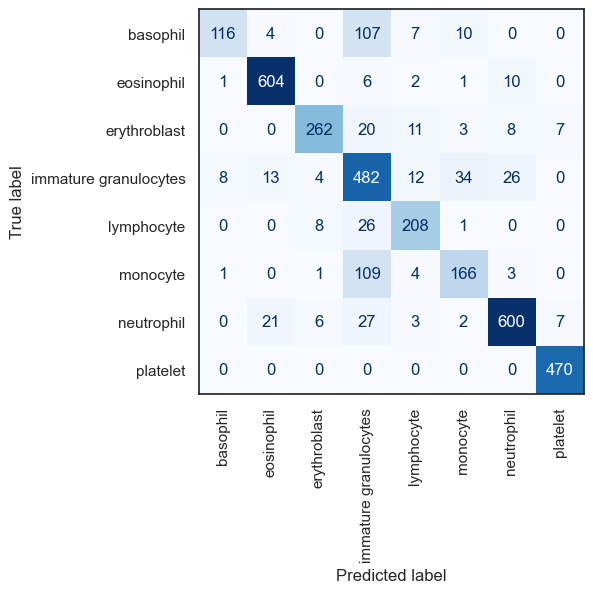

In [152]:
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(est,X_test,y_test,display_labels=class_names,cmap='Blues',colorbar=False,xticks_rotation=90,ax=ax)
plt.show()

* From the Confusion matrix below it can be seen that a lot of samples of some class predicted as another

## CNN

* A convolutional neural network (CNN) is a type of neural network specifically designed for image classification and recognition tasks. CNNs are composed of multiple layers of artificial neural networks, including convolutional layers, pooling layers, and fully connected layers.

* Convolutional layers in a CNN are responsible for extracting features from the input data. They do this by sliding a small window, or filter, over the input data and applying a set of weights to the data within the window to produce a feature map. By applying different filters to the input data, the CNN is able to learn a wide range of features at different scales, which can be useful for tasks such as object recognition.

In [138]:
classifier = keras.Sequential(name='CNN-128-MP-128-MP-0.3-64-MP-0.3-64-MP-Flaten-D128-0.3-D64')
classifier.add(layers.Conv2D(128, kernel_size=(5, 5),padding='same', activation='relu',input_shape=(28,28,3)))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))
classifier.add(layers.Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))
classifier.add(layers.Dropout(0.3))
classifier.add(layers.Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))
classifier.add(layers.Dropout(0.3))
classifier.add(layers.Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))
classifier.add(layers.Flatten())
classifier.add(layers.Dense(128, activation='relu'))
classifier.add(layers.Dropout(0.3))
classifier.add(layers.Dense(64, activation='relu'))
classifier.add(layers.Dense(8, activation='softmax'))
classifier.summary()

Model: "CNN-128-MP-128-MP-0.3-64-MP-0.3-64-MP-Flaten-D128-0.3-D64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_808 (Conv2D)         (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_808 (MaxPooli  (None, 14, 14, 128)      0         
 ng2D)                                                           
                                                                 
 conv2d_809 (Conv2D)         (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_809 (MaxPooli  (None, 7, 7, 128)        0         
 ng2D)                                                           
                                                                 
 dropout_606 (Dropout)       (None, 7, 7, 128)         0         
                                                                 
 conv2d_8

In [139]:
log_dir = "logs/fit_CNN/"+'CNN-128-MP-128-MP-0.3-64-MP-0.3-64-MP-Flaten-D128-0.3-D64'
tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=1,write_images=True)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30, verbose=1)

In [140]:
classifier.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=classifier.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_val,y_val),callbacks=[tb_callback])

In [ ]:
evaluation_plots(classifier)

#### Ploting  accuracy and losses of model evaluation 

**Batch normalization** is a technique for improving the training and generalization of deep neural networks. It works by normalizing the activations of a layer at each training iteration, so that they have a mean of zero and a standard deviation of one.

**CNN-64-MP-128-MP-32-Flaten-FC256** 100 epocs

As we can see here ,there are an high overfit ,because the model is trained too well on the training data
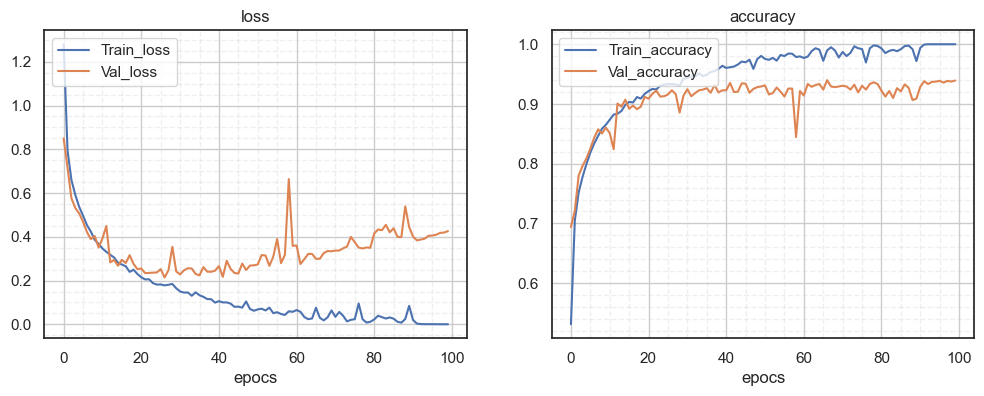

**CNN-128-MP-64-64-MP-32-32-MP-Flaten-FC128** 100 epocs

As we can see here ,there are also overfit but less than previous
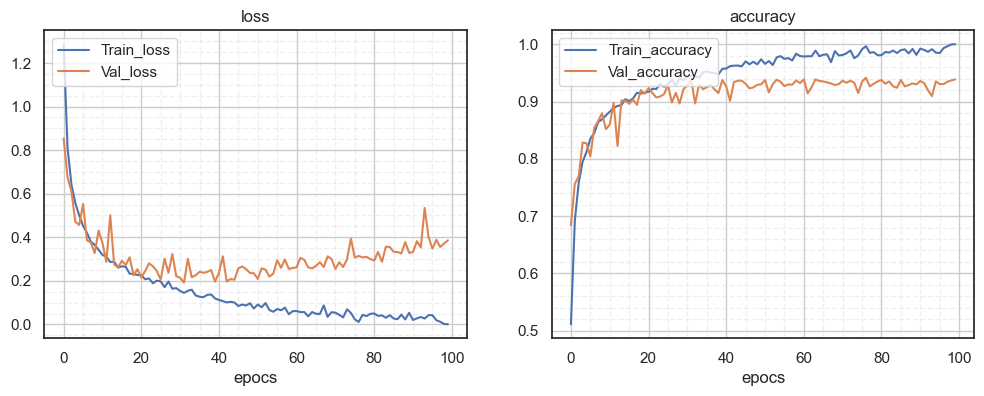

**CNN-128-MP-64-MP-64-MP-Flaten-FC128** 100 epocs

As we can see here ,there are also overfit but less than previos
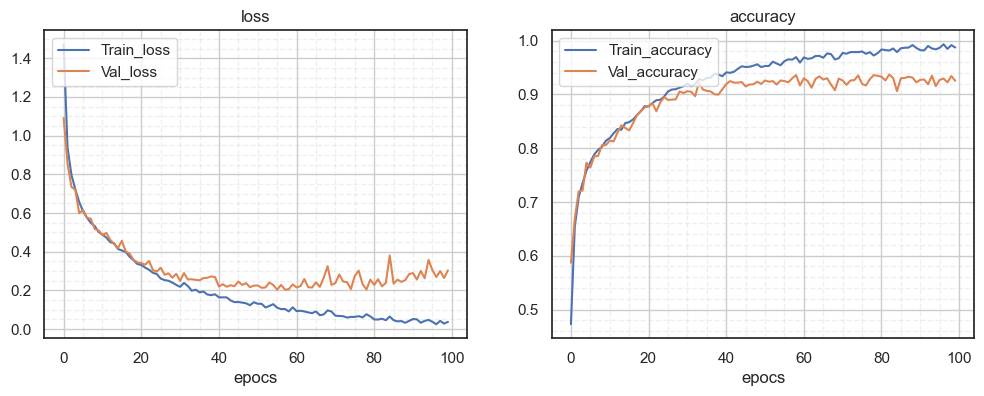

**CNN-128-MP-64-BN-MP-D0.3-64-BN-MP-D0.3-64-BN-MP-Flaten-D128-0.3-D64** 85 epocs

We tried to use Batch normalization technique for improving the training and generalization on each epoc ,but it can be seen ,that the technique doesnt work, maybe because each batch very different 

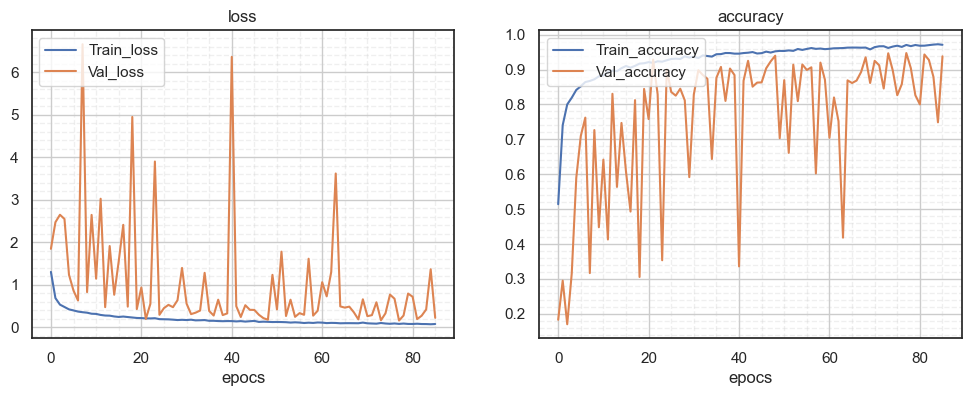

**CNN-128-MP-128-MP-D0.3-64-MP-D0.3-64-MP-Flaten-FC128-D0.3-FC64** 200 epocs

Now we used a dropout is a regularization technique to prevent overfitting ,it can be seen from the plot that a gap between training and validation losses are close to each other,and curves less jumpy

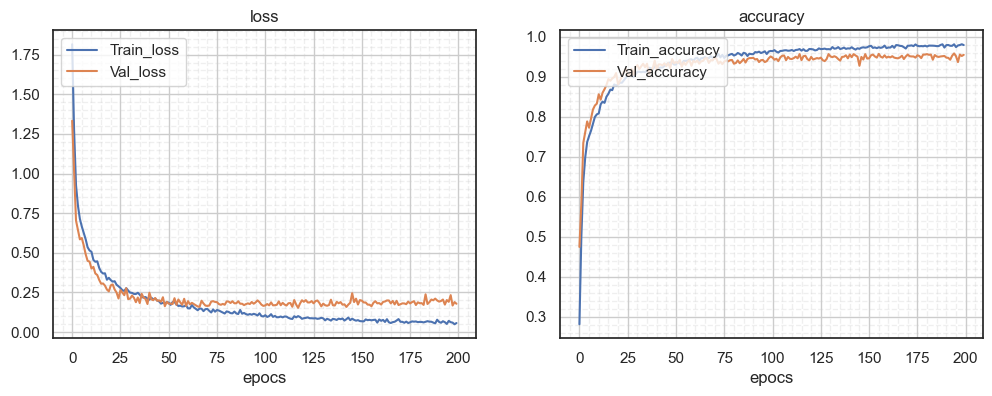

**CNN-128-MP-128-MP-D0.3-64-MP-D0.3-64-MP-Flaten-FC128-D0.3-FC64_ES** 200 epocs

Here we used early stopping technique that involves interrupting training when the model's performance on a validation
also dropout layers included
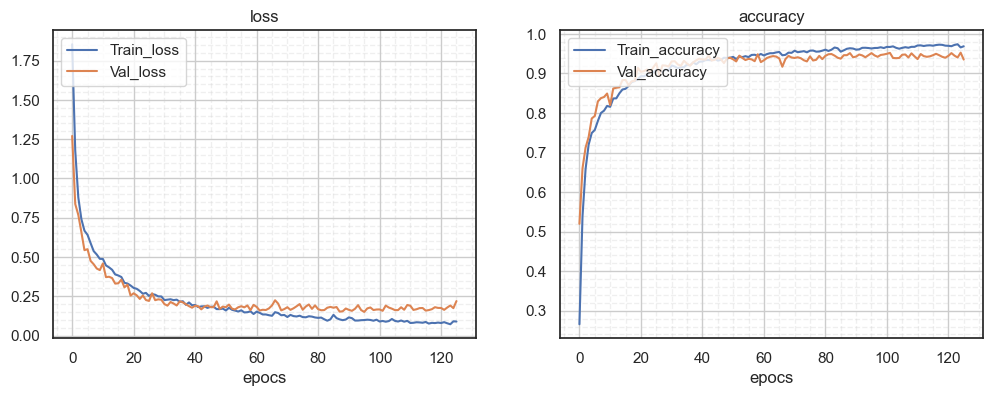

In [426]:
est_cnn = estimator(classifier, class_names)    
predicted_labels_cnn = est_cnn.predict(X_test)

107/107 [==============================] - 0s 3ms/step


In [427]:
print(classification_report(y_test,predicted_labels_cnn ,digits=4,target_names=class_names))

                       precision    recall  f1-score   support

             basophil     0.9724    0.7213    0.8282       244
           eosinophil     0.9903    0.9856    0.9880       624
         erythroblast     0.9577    0.9453    0.9515       311
immature granulocytes     0.8172    0.8877    0.8510       579
           lymphocyte     0.8935    0.9671    0.9289       243
             monocyte     0.8366    0.9014    0.8678       284
           neutrophil     0.9783    0.9459    0.9618       666
             platelet     0.9979    0.9979    0.9979       470

             accuracy                         0.9322      3421
            macro avg     0.9305    0.9190    0.9219      3421
         weighted avg     0.9358    0.9322    0.9322      3421



* As can be seen from the Classification report above,The data is unbalanced (diffirent support samples) ,an avarege accuracy about 0.93 , precision of each class varies from 0.99 to 0.81 ,this phenomenom can also be seen in recall and f1-score

107/107 [==============================] - 0s 2ms/step


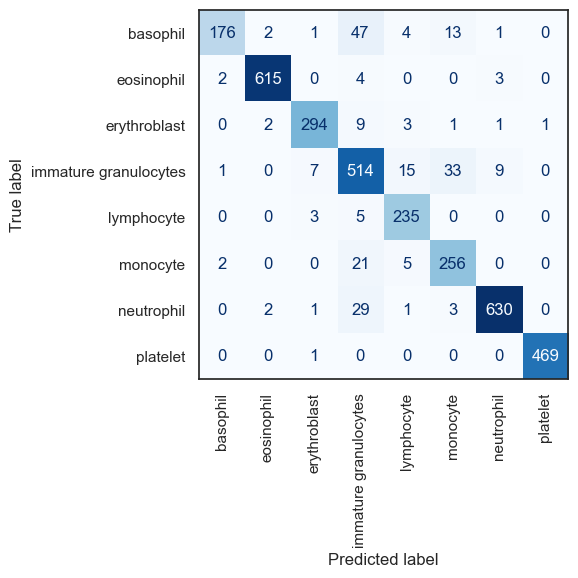

In [428]:
ConfusionMatrixDisplay.from_estimator(est_cnn,X_test,y_test,display_labels=class_names,cmap='Blues',colorbar=False,xticks_rotation=90)
plt.show()

* From the Confusion matrix below it can be seen that the predictions relatively accurate 

### Conclusion and comparasion between DNN and CNN


Fully connected layers are a type of layer in which every node in the layer is connected to every node in the previous layer. Fully connected layers are used to process and classify input data, and are a basic building block of many types of neural networks.

Convolutional layers, on the other hand, are specifically designed for image classification and recognition tasks. Convolutional layers apply a set of filters, to the input data using a sliding window to produce a feature map. By applying different filters to the input data.

While fully connected layers and convolutional layers can be used in the same neural network, they are typically used for different purposes. Fully connected layers are generally used to process and classify input data, while convolutional layers are used to extract features from images.

Convolutional layers takes a lot of training time compared to fully connected layers.
Also it can be seen that the predictions by using convolutional layers more accurate than fully connected layers ,0.93 verus 0.85

**It's also important to note that every training run we will different results.**

## HyperParameter Tuning 

* Hyperparameter tuning refers to the process of choosing the optimal values for a machine learning model's hyperparameters.    Hyperparameters are settings that determine the behavior of the model, and they are typically set prior to training the model.
  Hyperparameter tuning is an important step in the machine learning process because the performance of the model can be   significantly influenced by the hyperparameters chosen.
  
*  We chose to optimize our model from the previous CNN part by different Activation Functions and Optimizers

**Activation** - activation function is a function that is applied to the output of a neuron in a neural network to determine whether it should be activated or not. Activation functions are a crucial component of neural networks, as they allow the network to learn and make decisions based on the input data.

**Optimizer**- optimizer is an algorithm that is used to adjust the parameters of a machine learning model in order to minimize a loss function.

In [146]:
from tensorboard.plugins.hparams import api as hp

In [147]:
HP_Activation = hp.HParam('activation', hp.Discrete(['sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu','relu']))
HP_Otimizers = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd','adagrad','adamax','adadelta']))
METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(
      hparams=[HP_Activation, HP_Otimizers],
      metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
     )

In [151]:
def train_test_model(hparams,logdir):
    model = keras.Sequential()
    model.add(layers.Conv2D(128, kernel_size=(5, 5),padding='same', activation=hparams[HP_Activation],input_shape=(28,28,3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(128, kernel_size=(3, 3),padding='same', activation=hparams[HP_Activation]))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(64, kernel_size=(3, 3),padding='same', activation=hparams[HP_Activation]))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(64, kernel_size=(3, 3),padding='same', activation=hparams[HP_Activation]))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation=hparams[HP_Activation]))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation=hparams[HP_Activation]))
    model.add(layers.Dense(8, activation='softmax'))
    
    model.compile(
      optimizer=hparams[HP_Otimizers],
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=15) 
    _, accuracy = model.evaluate(x_val, y_val)
    return accuracy

In [152]:
def run(logdir,run_name,hparams):
    global accuracy_hist    
    with tf.summary.create_file_writer(logdir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy= train_test_model(hparams,logdir)
        accuracy_hist.append([run_name,accuracy])
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
accuracy_hist =[]
for activation in HP_Activation.domain.values:
    for optimizer in HP_Otimizers.domain.values:
        hparams = {
            HP_Activation:activation,
            HP_Otimizers: optimizer
            }
        run_name = "{}_{}".format(optimizer,activation) 
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        run('logs/hparam_tuning/' + run_name,run_name, hparams)


In [154]:
df=pd.DataFrame(data =accuracy_hist,columns=['Params' ,'Aaccuracy on Val'])
df[['Optimizer', 'Activation']] = df["Params"].apply(lambda x: pd.Series(str(x).split("_")))
df=df.drop('Params',axis=1)

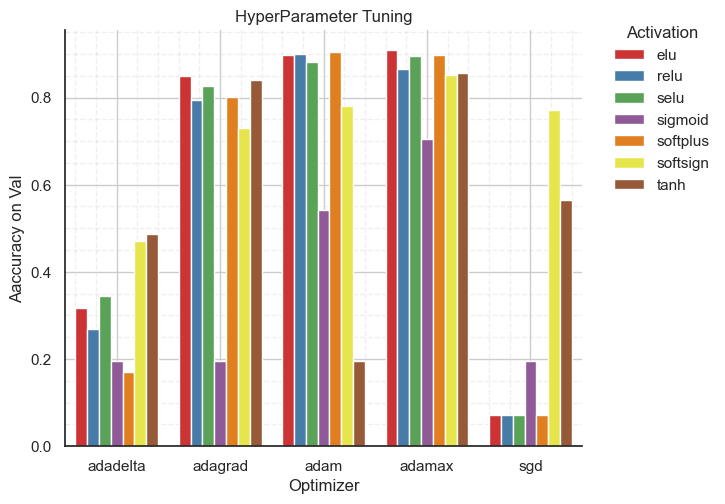

In [159]:
ax=sns.catplot(
    data=df, kind="bar",
    x="Optimizer", y="Aaccuracy on Val", hue="Activation", palette="Set1", height=5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid(visible=True ,which='minor',linestyle='--',alpha=0.3)
plt.minorticks_on()
plt.tight_layout()
plt.grid()
plt.title('HyperParameter Tuning')
plt.show()

**Parrallel View**
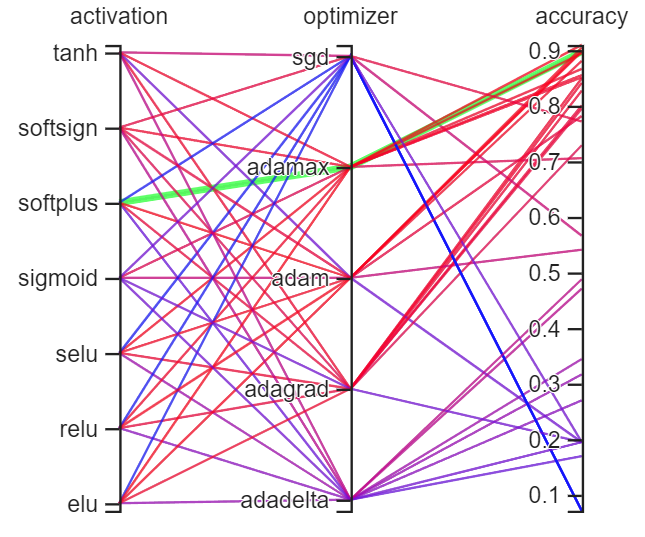

* As can be seen with this technique we can see the diffirent effects of each HyperParameter (Activation function and Optimizer).

* After Running training by 15 epocs it can be seen that the best pair of the parameters on the validation set are Optimizer: Adamax and Activation Function: ELU

In [160]:
# for DNN  log_dir = "logs/fit_DNN/"
# for CNN  log_dir = "logs/fit_CNN/"
# for HP tuning log_dir = logs/hparam_tuning/

# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs/hparam_tuning/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
